In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import (
    Model,
    Sequential
)
from tensorflow.keras.layers import (
    Activation,
    AveragePooling2D,
    BatchNormalization,
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    Input, 
    MaxPooling2D,
    Rescaling,
)
import matplotlib.pyplot as plt



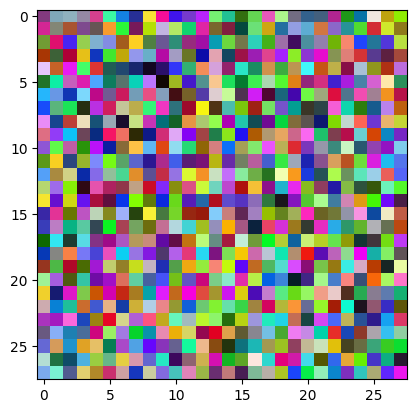

In [16]:
# generate dummy data
input_dim = (28,28,3)
n_sample = 10

X = np.random.randint(0,255, (n_sample,)+input_dim)
y = np.random.uniform(0,1, (n_sample,))

plt.imshow(X[0])

In [17]:
# create base model
inp = Input(input_dim)
x = Conv2D(8, (3,3))(inp)
x = Flatten()(x)
out = Dense(1)(x)

out

<KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor_8>

In [18]:
# fit base model with manual scaling
model = Model(inp, out)
model.compile('adam', 'mse')
model.fit(X/255, y, epochs=3)


Epoch 1/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step - loss: 0.1416
Epoch 2/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.5305
Epoch 3/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0144


In [19]:
# create new model with pretrained weight + rescaling at the top
inp = Input(input_dim)
scaled_input = Rescaling(scale=1.0/255.0, offset=0.0)(inp)
out = model(scaled_input)
scaled_model = Model(inp, out)


In [ ]:
# compare prediction with manual scaling vs layer scaling
pred = model.predict(X/255)
pred_scaled = scaled_model.predict(X)

(pred.round(5) == pred_scaled.round(5)).all() # True

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
